<a href="https://colab.research.google.com/github/Magnus-Wangari/ID3-ML-Model-Programming/blob/master/onehotencoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV

In [0]:
from google.colab import files 
uploads = files.upload()

In [0]:
data = pd.read_csv('Nairobi Office Price Ex.csv')
data.head()
nominal =['LOC','FUR','WATER','HK_SER']
ordinal = ['AMB','PROX_SCH','PROX_MALL','PROX_ROAD']

for feature in ordinal:
  value = data[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  data[feature]= trans_f
#data




In [0]:
data = pd.concat([pd.get_dummies(data[nominal],prefix ='Estate'),data],axis=1)
data.drop(nominal,axis=1,inplace=True)
data

In [20]:
X=data.drop('PRICE', 1)
y= data['PRICE']
#print(y)
regressor =LassoCV()
regressor.fit(X,y)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

[ 0.          0.         -4.34377698  0.         -0.         -0.
  0.         -0.          0.          0.         -0.          2.08572213
  0.         -3.99497824 -0.29801036  1.41027015]


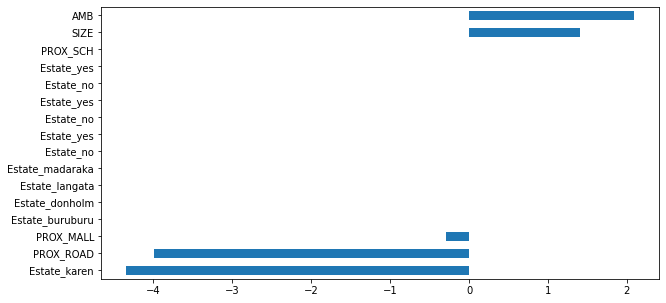

In [27]:
print(regressor.coef_)
coef_col =pd.Series(regressor.coef_,index=X.columns)
#print(coef_col)
sorted_coef=coef_col.sort_values()
matplotlib.rcParams['figure.figsize'] =(10.0,5.0)
#sorted_coef.plot()
sorted_coef.plot(kind='barh')